# 1. Importing the dependencies:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# 2. Data importing and preprocessing:

In [7]:
# load data
car_dataset = pd.read_csv('/content/car data.csv')

In [8]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
car_dataset.shape

(301, 9)

In [10]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


From the data informaiton, we can see that:

*   The data hasn't any missing values

In [13]:
# The distribution of categorical data
print("Fuel_type column: \n", car_dataset.Fuel_Type.value_counts())
print("Seller_Type column: \n", car_dataset.Seller_Type.value_counts())
print("Transmission column: \n", car_dataset.Transmission.value_counts())

Fuel_type column: 
 Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Seller_Type column: 
 Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Transmission column: 
 Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [14]:
# Categorical data encoding
car_dataset.replace({'Fuel_Type': {'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
car_dataset.replace({'Seller_Type': {'Dealer':0, 'Individual':1}}, inplace=True)
car_dataset.replace({'Transmission': {'Manual':0, 'Automatic':1}}, inplace=True)

In [15]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## 3. Splitting data into train set and test set:

In [16]:
x = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)  # Delete column
y = car_dataset['Selling_Price']

In [17]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [18]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

# 4. Model training:

### 1. Linear regression model:

In [20]:
# Loading the model
lr_model = LinearRegression()

In [23]:
# Fit the model with the training data
lr_model.fit(x_train, y_train)

LinearRegression()

**Evaluation:**

Compare the predicted values with the true actual values.

There are many matrices for linear regression evaluation. For example, R squared error, mean absolute error, etc..

In [24]:
# predicttion on training data
training_data_pred = lr_model.predict(x_train)

In [28]:
print(training_data_pred)

[ 3.73088505e+00  5.60702081e+00  7.79779356e+00 -1.88374756e+00
  6.71614572e+00  8.14343296e+00  5.84067525e+00  6.17919527e+00
  6.15863751e+00  1.59459051e+01  2.15385926e+00  1.11618544e+00
 -4.05463414e-01  6.69051516e+00  6.81961414e+00  1.02957394e+00
  6.74306974e+00  1.43864300e+01  3.00001893e+00  7.95149024e+00
 -8.38569413e-01  9.02067892e+00  1.21210550e+00  2.20040027e+00
 -8.23744275e-01  7.52651502e-01  1.00142469e+01 -4.08950275e-01
 -2.40418357e+00  9.99845989e+00  6.81867179e+00  1.09249928e+00
  4.36158792e+00  9.20660480e-02  3.48993776e+00  2.78147834e+00
  1.50401026e+00  4.65736158e-01  1.68679810e+00  1.18722506e+00
  4.32936153e+00  6.09932798e+00  9.51639926e-01  7.52875828e-01
  6.05967594e+00  3.49453005e+00  2.40969246e+00  7.52230513e+00
  4.63113915e+00  4.44239322e+00  4.22460259e+00  2.71077171e+00
  4.46881874e+00  1.76156730e+00  2.86100050e-01  3.95181249e+00
  1.36371845e+00  4.63046605e+00  1.44343122e+00  7.27550233e+00
  7.26488044e+00  6.54659

In [25]:
# R squared error
error_score = metrics.r2_score(y_train, training_data_pred)

In [27]:
print("R squared error =", error_score)

R squared error = 0.8799451660493711


**Visualize actual vs predicted prices:**

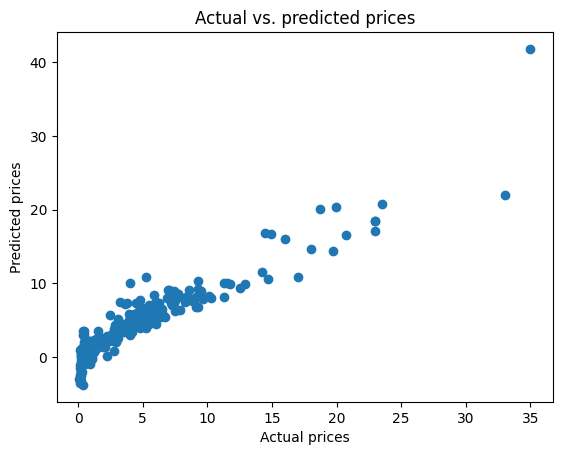

In [30]:
plt.scatter(y_train, training_data_pred)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual vs. predicted prices')
plt.show()

In [31]:
# Predicting prices on test data
test_data_pred = lr_model.predict(x_test)

In [34]:
# R squared error
test_error_score = metrics.r2_score(y_test, test_data_pred)
print("R squared value = ", test_error_score)

R squared value =  0.8365766715027051


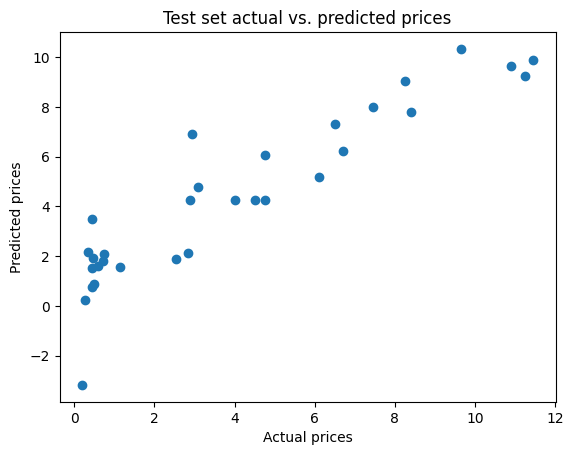

In [35]:
# Visalize the actual vs. predicted prices of the test set
plt.scatter(y_test, test_data_pred)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Test set actual vs. predicted prices')
plt.show()

Linear regression performs well on cases which are directly positive correlted to the target.  

## 2. Lasso regression
### 1. On training set:

In [36]:
lasso_model = Lasso()

In [37]:
lasso_model.fit(x_train, y_train)

Lasso()

In [38]:
lasso_training_data_pred = lasso_model.predict(x_train)

In [39]:
lasso_train_error_score = metrics.r2_score(y_train, lasso_training_data_pred)

In [40]:
print("R squared error for trainig set based on lasso prediction = ", lasso_train_error_score)

R squared error for trainig set based on lasso prediction =  0.8427856123435794


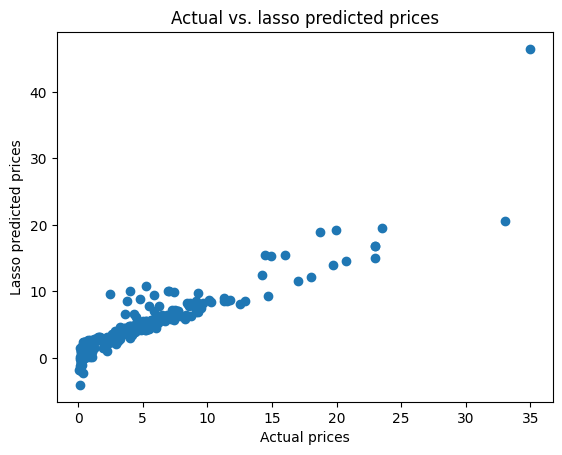

In [41]:
plt.scatter(y_train, lasso_training_data_pred)
plt.xlabel("Actual prices")
plt.ylabel("Lasso predicted prices")
plt.title("Actual vs. lasso predicted prices")
plt.show()

### 3. On test set:

In [42]:
lasso_test_data_pred = lasso_model.predict(x_test)

In [43]:
lasso_test_error_score = metrics.r2_score(y_test, lasso_test_data_pred)

In [44]:
print("R squared error for test set based on lasso prediction = ", lasso_test_error_score)

R squared error for test set based on lasso prediction =  0.8709167941173195


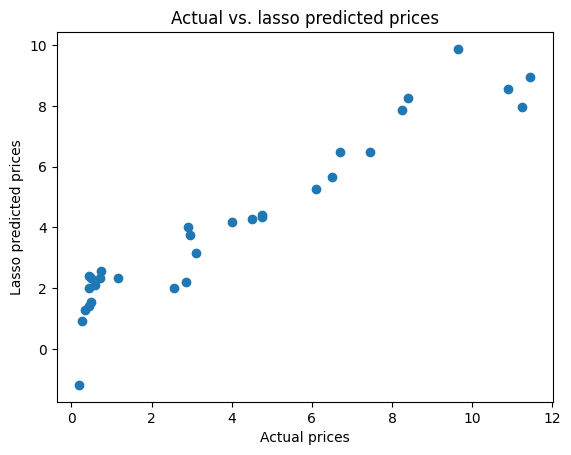

In [45]:
plt.scatter(y_test, lasso_test_data_pred)
plt.xlabel("Actual prices")
plt.ylabel("Lasso predicted prices")
plt.title("Actual vs. lasso predicted prices")
plt.show()